Se presentan las librerias utilizdas, pandas es una libreria de analisis de datos ; Tweet_mx api  desarollada para administrar las querrys y la extracion de tweets tambien sera la clase utilizada para la administracion de la base de datos.

In [3]:
import re
import unicodedata
import pandas as pd
from  Tweet_mx import Tweet_mx
from Base_d import Bd
import csv
import matplotlib.pyplot as plt
import seaborn as sns 
import os  
import warnings
warnings.filterwarnings(action = 'ignore') 


In [3]:
def clean_accents(text):
    # Eliminar signos de puntuación
    text = re.sub(r'[^\w\s]+', ' ', text)
    # Eliminar emojis
    text = text.encode('ascii', 'ignore').decode('utf-8')
    # Eliminar acentos
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('ASCII')
    # Convertir todo el texto a minúsculas
    text = text.lower()
    return text

def clave_valor_maximo(diccionario):
    clave_maxima = max(diccionario, key=diccionario.get)
    valor_maximo = diccionario[clave_maxima]
    return clave_maxima, valor_maximo

def count_words(text):
    exclude_words = ['el',"gan",'si','sus', 'jos','san','mis','fue','zcalo','amrica','leo','este','ha','la', 'no','los', 'las', 'un', 'una', 'unos', 'unas', 'al', 'del', 'lo', 'le', 'y', 'e', 'o', 'u', 'de', 'a', 'en', 'que', 'es', 'por', 'para', 'con', 'se', 'su', 'les', 'me', 'q', 'te', 'pero', 'mi', 'ya', 'cuando', 'como', 'estoy', 'voy', 'porque', 'he', 'son', 'solo', 'tengo', 'muy','ja','JAJA','JAja']
    top_words = {}
    words = text.lower().split()
    for word in words:
        if word not in exclude_words:
            top_words[word] = top_words.get(word, 0) + 1
    top_words = dict(sorted(top_words.items(), key=lambda x: x[1], reverse=True)[:100])
    return top_words

def clean_sig(text):
    # Eliminar signos de puntuación
    text = re.sub('[^\w\s]|_', ' ', text)


    # Separar emojis de palabras
    text = re.sub('([^\w\s])', r' \1 ', text)
    
    # Convertir todo a minúsculas
    text = text.lower()
    
    # Eliminar espacios en blanco adicionales
    text = re.sub('\s+', ' ', text).strip()
    
    return text

def date_clean(date):
    date_clean = date.split("+")[0]
    return date_clean

def tweet_clean_links(tweet):

    patron = r'https?://[^\s]+'

    tweet_sin_links = re.sub(patron, '',tweet)
    return tweet_sin_links

def tweet_clean_caracters(tweet):
    tweet_clean_caracters= re.sub(r'[@#](\w+)', r'\1', tweet)
    return tweet_clean_caracters

def extraer_t(t_topics,fecha):
    q = Tweet_mx()
    limit  = 50000//len(t_topics)
    entero = 0
    q.set_since(fecha[0])
    q.set_until(fecha[1])
    for t_topic in t_topics:
        q.set_hashtag(t_topic)
        q.set_folder('/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/' )
        df_tweets=q.extraer_tweets(limit,entero)
        print(q.get_path())
        df_tweets.to_csv(q.get_path())
        
def guardar_t(hashtags,fecha):
    bd=Bd()
    bd.set_user("lVC$4")
    bd.set_host("localhost")
    bd.set_datebase("tweet_mx")
    bd.set_passwoord("anes%ar&t$noc")
    
    q= Tweet_mx()
    q.set_until(fecha)
    q.set_folder("/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/")  
    
    for hashtag in hashtags:
        q.set_hashtag(hashtag)
        print(q.get_path())
        f=open(q.get_path(), newline='') 
        reader = csv.reader(f)
        tweet_concatenated=""
        for i, row in enumerate(reader):
            
            
            if i > 1:
                username=row[4]
                idTweet=str(row[1])
                date = date_clean(row[2])
                tweet=tweet_clean_links(row[3])
                tweet=tweet_clean_caracters(tweet)
                tweet=clean_sig(tweet)
                tweet=clean_accents(tweet)
                bd.insert_into_tweetdb1( idTweet,tweet,username,hashtag,date)
                tweet_concatenated+=tweet
            
        archivo = ("/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/clean_cvs/" + hashtag + '.csv')
        with open(archivo, 'w', newline='') as archivo:
            writer = csv.writer(archivo)
            writer.writerow([tweet_concatenated])
        print(archivo)

def dicc_words_acount(hashtag):
    archivo = ("/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/clean_cvs/" + hashtag +'.csv')
    csv.field_size_limit(1000000)
    f=open(archivo, newline='') 
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        d=count_words(row[0])
    return d      

def load_dicc_words_acount(hashtags):
    bd=Bd()
    bd.set_user("lVC$4")
    bd.set_host("localhost")
    bd.set_datebase("tweet_mx")
    bd.set_passwoord("anes%ar&t$noc")
    for hashtag in hashtags:
        print(hashtag)
        d=dicc_words_acount(hashtag)
    for clave, valor in d.items():
        bd.insert_into_hashtagdb(hashtag, clave, valor)

Tweet_mx es una clase que administra las consultas y las estracciones desde la api de twitter
en el seguiente bloque de instruciones se prapara la consulta. 

In [2]:
q = Tweet_mx()

q.set_hashtag("Tammy")
q.set_until("2023-03-16")
q.set_since("2023-03-15")
print(q.get_querry())


Tammy lang:es-mx until:2023-03-16 since:2023-03-15 exclude:retweets exclude:replies


Extraer_tweets resive como parametros la cantidad de tweets a extraer { limit } y tambien {entero} si  el o los tweeets, son purgados de datos que no son requeridos para el analisis, { entero =1 } define que el tweet esta completo de cualquier otra forma devolera los datos limpios  al  ejecutar la consulta.
en este bloque se presenta los campos de datos que contiene un tweet entero. 

In [3]:

limit  = 1
entero = 1
tweets_df1 =q.extraer_tweets(limit,entero)
tweets_df1.dtypes


url                              object
date                datetime64[ns, UTC]
rawContent                       object
renderedContent                  object
id                                int64
user                             object
replyCount                        int64
retweetCount                      int64
likeCount                         int64
quoteCount                        int64
conversationId                    int64
lang                             object
source                           object
sourceUrl                        object
sourceLabel                      object
links                            object
media                            object
retweetedTweet                   object
quotedTweet                      object
inReplyToTweetId                 object
inReplyToUser                    object
mentionedUsers                   object
coordinates                      object
place                            object
hashtags                         object


Tweet_mx devuelve un  data frame con los siguientes campos  IdTweet, Datetime, Tweet, Username; estos campos seran los utilizados en el analisis

In [6]:

limit  = 5
entero = 0
tweets_df1=q.extraer_tweets(limit,entero)
tweets_df1.head

<bound method NDFrame.head of               Tweet Id                  Datetime  \
0  1636155311143747588 2023-03-15 23:59:59+00:00   
1  1636155304260845568 2023-03-15 23:59:57+00:00   
2  1636155297646485505 2023-03-15 23:59:55+00:00   
3  1636155293431214080 2023-03-15 23:59:54+00:00   
4  1636155286003257344 2023-03-15 23:59:53+00:00   

                                               Tweet         Username  
0  Tiste por la Tammy 🤧. De verdad que se miraba ...     Dhamarz_stwo  
1  Hoy supe quien es Tammy Parra, pero tengo una ...         Karibri_  
2      Ouch, hasta a mí me dolió lo de Tammy Parra 😥   milian_valeria  
3  Tammy cada vez me sorprende más, con lo mucho ...  _gabrielaocampo  
4  ¿Qué pedo con los que le están tirando hate a ...    karenshibata_  >

se analizaran los siguientes trending topics de la fecha 17_03_2023

<img src="/home/lucsa/Documentos/Nao.py(data_analyst)/captura/imagenes/trending_topics_mx_17_03_2023.png">

In [5]:

fecha=["2023-03-19","2023-03-20"]
hashtags=["Checo","Akron","América","Chivas","Cisneros","Lara","Pocho","Rayados","Romo","Mozo","Cabecita","Vega","Tigres","Andrada","Chima","Pizarro","#ClasicoNacional","Rafa", "Puente","Pumas","Norma Piña","San José","Henry","Judas","Verstappen","Gonzalo","Barça","Leo Suárez","Violencia","Zócalo"]
extraer_t(hashtags,fecha)

NameError: name 'extraer_t' is not defined

In [7]:
hashtags=["Checo","Akron","América","Chivas","Cisneros","Lara","Pocho","Rayados","Romo","Mozo","Cabecita","Vega","Tigres","Andrada","Chima","Pizarro","#ClasicoNacional","Rafa", "Puente","Pumas","Norma Piña","San José","Henry","Judas","Verstappen","Gonzalo","Barça","Leo Suárez","Violencia","Zócalo"]
guardar_t(hashtags,"2023-03-20")


Error while connecting to MySQL 1045 (28000): Access denied for user 'lucsa'@'localhost' (using password: NO)
/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/Checo_2023-03-20.csv
<_io.TextIOWrapper name='/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/clean_cvs/Checo.csv' mode='w' encoding='UTF-8'>
/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/Akron_2023-03-20.csv
<_io.TextIOWrapper name='/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/clean_cvs/Akron.csv' mode='w' encoding='UTF-8'>
/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/América_2023-03-20.csv
<_io.TextIOWrapper name='/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/clean_cvs/América.csv' mode='w' encoding='UTF-8'>
/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/Chivas_2023-03-20.csv
<_io.TextIOWrapper name='/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/clean_cvs/Chivas.csv' mode='w' encoding='UTF-8'>
/home/lucsa/

In [5]:
fecha=["2023-03-20","2023-03-21"]
hashtags=["Quemar","RHCP","Norma Piña","Fentanes","Judas","#FelizLunes","Pumas","#SaudiArabianGP","Acarreados","Alonso","Barça","Barcelona","Carvajal","Checo","chivas","Clasismo","Henry","Red Bull","San José","Taylor","Verstappen","Zócalo","Louis","Tomlinson","América","Kessie","Rafa Puente","Xavi","Benzema","Lara","Madrid"]
extraer_t(hashtags,fecha)

/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/Quemar_2023-03-21.csv
/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/RHCP_2023-03-21.csv
/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/Norma Piña_2023-03-21.csv
/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/Fentanes_2023-03-21.csv
/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/Judas_2023-03-21.csv
/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/#FelizLunes_2023-03-21.csv
/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/Pumas_2023-03-21.csv
/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/#SaudiArabianGP_2023-03-21.csv
/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/Acarreados_2023-03-21.csv
/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/Alonso_2023-03-21.csv
/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/Barça_2023-03-21.csv
/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics

In [6]:
hashtags=["AIFA","Bayern Munich","Floricienta","Himno","John Kerry","NINE OR NONE","Ohtani","QSMP","Teatro del Pueblo","Corea del Norte","ESENCIA OUT NOW","Scarlett Camberos","Humbe","Jenare","#floresamarillas","Surinam","TU VALOR","The Rock","Japón","SNIPER", "REINA", "AZUL","Shenhe","#21deMarzo","#FelizMartes","#WorldBaseballClassic","Alicia Keys","Américas","Aries","Benito Juárez","Black Adam"]
fecha=["2023-03-21","2023-03-22"]
extraer_t(hashtags,fecha)

NameError: name 'extraer_t' is not defined

In [6]:
hashtags=["Checo","Akron","América","Chivas","Cisneros","Lara","Pocho","Rayados","Romo","Mozo","Cabecita","Vega","Tigres","Andrada","Chima","Pizarro","#ClasicoNacional","Rafa", "Puente","Pumas","Norma Piña","San José","Henry","Judas","Verstappen","Gonzalo","Barça","Leo Suárez","Violencia","Zócalo"]
load_dicc_words_acount(hashtags)

Checo
Akron
América
Chivas
Cisneros
Lara
Pocho
Rayados
Romo
Mozo
Cabecita
Vega
Tigres
Andrada
Chima
Pizarro
#ClasicoNacional
Rafa
Puente
Pumas
Norma Piña
San José
Henry
Judas
Verstappen
Gonzalo
Barça
Leo Suárez
Violencia
Zócalo


In [12]:
#hashtags=["Quemar","RHCP","Norma Piña","Fentanes","Judas","#FelizLunes"]
hashtags=[ "Pumas","#SaudiArabianGP","Acarreados","Alonso","Barça","Barcelona","Carvajal","Checo","chivas","Clasismo","Henry","Red Bull","San José","Taylor","Verstappen","Zócalo","Louis","Tomlinson","América","Kessie","Rafa Puente","Xavi","Benzema","Lara","Madrid"]
guardar_t(hashtags,"2023-03-21")


Error while connecting to MySQL 1045 (28000): Access denied for user 'lucsa'@'localhost' (using password: NO)
/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/Pumas_2023-03-21.csv
<_io.TextIOWrapper name='/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/clean_cvs/Pumas.csv' mode='w' encoding='UTF-8'>
/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/#SaudiArabianGP_2023-03-21.csv
<_io.TextIOWrapper name='/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/clean_cvs/#SaudiArabianGP.csv' mode='w' encoding='UTF-8'>
/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/Acarreados_2023-03-21.csv
<_io.TextIOWrapper name='/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/clean_cvs/Acarreados.csv' mode='w' encoding='UTF-8'>
/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/Alonso_2023-03-21.csv
<_io.TextIOWrapper name='/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/clean_cvs/Alonso.csv' mode='w' enco

In [4]:
hashtags=["AIFA","Bayern Munich","Floricienta","Himno","John Kerry","NINE OR NONE","Ohtani","QSMP","Teatro del Pueblo","Corea del Norte","ESENCIA OUT NOW","Scarlett Camberos","Humbe","Jenare","#floresamarillas","Surinam","TU VALOR","The Rock","Japón","SNIPER", "REINA", "AZUL","Shenhe","#21deMarzo","#FelizMartes","#WorldBaseballClassic","Alicia Keys","Américas","Aries","Benito Juárez","Black Adam"]

guardar_t(hashtags,"2023-03-22")

Error while connecting to MySQL 1045 (28000): Access denied for user 'lucsa'@'localhost' (using password: NO)
/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/AIFA_2023-03-22.csv
<_io.TextIOWrapper name='/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/clean_cvs/AIFA.csv' mode='w' encoding='UTF-8'>
/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/Bayern Munich_2023-03-22.csv
<_io.TextIOWrapper name='/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/clean_cvs/Bayern Munich.csv' mode='w' encoding='UTF-8'>
/home/lucsa/Documentos/Nao_py_data_analyst/captura/topics_csv/Floricienta_2023-03-22.csv


KeyboardInterrupt: 

In [10]:
hashtags=[ "Pumas","#SaudiArabianGP","Acarreados","Alonso","Barça","Barcelona","Carvajal","Checo","chivas","Clasismo","Henry","Red Bull","San José","Taylor","Verstappen","Zócalo","Louis","Tomlinson","América","Kessie","Rafa Puente","Xavi","Benzema","Lara","Madrid"]

load_dicc_words_acount(hashtags)

Error while connecting to MySQL 1045 (28000): Access denied for user 'lucsa'@'localhost' (using password: NO)
Pumas
#SaudiArabianGP
Acarreados
Alonso
Barça
Barcelona
Carvajal
Checo
chivas
Clasismo
Henry
Red Bull
San José
Taylor
Verstappen
Zócalo
Louis
Tomlinson
América
Kessie
Rafa Puente
Xavi
Benzema
Lara
Madrid


In [11]:
hashtags=["AIFA","Bayern Munich","Floricienta","Himno","John Kerry","NINE OR NONE","Ohtani","QSMP","Teatro del Pueblo","Corea del Norte","ESENCIA OUT NOW","Scarlett Camberos","Humbe","Jenare","#floresamarillas","Surinam","TU VALOR","The Rock","Japón","SNIPER", "REINA", "AZUL","Shenhe","#21deMarzo","#FelizMartes","#WorldBaseballClassic","Alicia Keys","Américas","Aries","Benito Juárez","Black Adam"]

load_dicc_words_acount(hashtags)

Error while connecting to MySQL 1045 (28000): Access denied for user 'lucsa'@'localhost' (using password: NO)
AIFA
Bayern Munich
Floricienta
Himno
John Kerry
NINE OR NONE
Ohtani
QSMP
Teatro del Pueblo
Corea del Norte
ESENCIA OUT NOW
Scarlett Camberos
Humbe
Jenare
#floresamarillas
Surinam
TU VALOR
The Rock
Japón
SNIPER
REINA
AZUL
Shenhe
#21deMarzo
#FelizMartes
#WorldBaseballClassic
Alicia Keys
Américas
Aries
Benito Juárez
Black Adam


Bd instancia la api en la que se almasenara la informacion extraida de los tweets
en el siguiente bloque de codigo se llebara acabo la configuracion de la coneccion y la creacion de la tabla en la que se guardaran los datos  

In [4]:
bd=Bd()
bd.set_user("lVC$4")
bd.set_host("localhost")
bd.set_datebase("tweet_mx")
bd.set_passwoord("anes%ar&t$noc")


Error while connecting to MySQL 1045 (28000): Access denied for user 'lucsa'@'localhost' (using password: NO)


In [3]:
print(bd.get_top_100_words_by_count_w())

[('san', 1425), ('jos', 1372), ('zcalo', 1230), ('norma', 1198), ('pia', 1127), ('bara', 1011), ('ministra', 742), ('amrica', 737), ('no', 565), ('prez', 484), ('clasiconacional', 479), ('guzmn', 447), ('puma', 429), ('quema', 406), ('leo', 389), ('figura', 386), ('este', 380), ('max', 376), ('pas', 360), ('ha', 357), ('luis', 356), ('golazo', 352), ('mxico', 343), ('real', 340), ('cualquier', 320), ('imagen', 315), ('surez', 306), ('persona', 303), ('llamado', 302), ('clubamerica', 299), ('foto', 299), ('intolerable', 297), ('lenguaje', 297), ('concordia', 294), ('serenidad', 294), ('hacemos', 293), ('posicionamiento', 293), ('smate', 292), ('extendido', 292), ('amlo', 288), ('normapia', 279), ('rodrguez', 278), ('quieres', 276), ('noalodio', 273), ('scjn', 271), ('black', 258), ('clsico', 258), ('presidenta', 256), ('arabia', 248), ('shazam', 247), ('estadio', 244), ('presidente', 238), ('contra', 236), ('adam', 232), ('latina', 229), ('da', 228), ('gol', 218), ('clsiconacional', 214

In [3]:
exclude_words = ['ms','da','hacemos','clubamerica', 'ha', 'quieres','0', '1', '2', '3', '4', '5', '6','7', '8', '9',  'gran','vs','fin','fue','el',"gan",'si','sus', 'jos','san','mis','zcalo','amrica','leo','este','ha','la', 'no','los', 'las', 'un', 'una', 'unos', 'unas', 'al', 'del', 'lo', 'le', 'y', 'e', 'o', 'u', 'de', 'a', 'en', 'que', 'es', 'por', 'para', 'con', 'se', 'su', 'les', 'me', 'q', 'te', 'pero', 'mi', 'ya', 'cuando', 'como', 'estoy', 'voy', 'porque', 'he', 'son', 'solo', 'tengo', 'muy','ja','JAJA','JAja']
for word in exclude_words:
     bd.delete_w_from_hashtagdb(word)

Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record delet

In [4]:

print(bd.get_top_100_words_by_count_w())

[('norma', 1198), ('pia', 1127), ('bara', 1011), ('ministra', 742), ('prez', 484), ('clasiconacional', 479), ('guzmn', 447), ('puma', 429), ('quema', 406), ('figura', 386), ('max', 376), ('pas', 360), ('luis', 356), ('golazo', 352), ('mxico', 343), ('real', 340), ('cualquier', 320), ('imagen', 315), ('surez', 306), ('persona', 303), ('llamado', 302), ('foto', 299), ('lenguaje', 297), ('intolerable', 297), ('serenidad', 294), ('concordia', 294), ('posicionamiento', 293), ('extendido', 292), ('smate', 292), ('amlo', 288), ('normapia', 279), ('rodrguez', 278), ('noalodio', 273), ('scjn', 271), ('clsico', 258), ('black', 258), ('presidenta', 256), ('arabia', 248), ('shazam', 247), ('estadio', 244), ('presidente', 238), ('contra', 236), ('adam', 232), ('latina', 229), ('gol', 218), ('clsiconacional', 214), ('ruiz', 159), ('lopezobrador', 157), ('f1', 156), ('condena', 152), ('red', 151), ('rafael', 150), ('partido', 145), ('mara', 142), ('bull', 140), ('equipo', 140), ('dios', 138), ('padre

In [5]:
exclude_words =['18','va','quien', '20','ser', 'the', 'est','clsiconacional','adam','norma','pia',]
for word in exclude_words:
     bd.delete_w_from_hashtagdb(word)

Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table


In [6]:

print(bd.get_top_100_words_by_count_w())


[('bara', 1011), ('ministra', 742), ('prez', 484), ('clasiconacional', 479), ('guzmn', 447), ('puma', 429), ('quema', 406), ('figura', 386), ('max', 376), ('pas', 360), ('luis', 356), ('golazo', 352), ('mxico', 343), ('real', 340), ('cualquier', 320), ('imagen', 315), ('surez', 306), ('persona', 303), ('llamado', 302), ('foto', 299), ('lenguaje', 297), ('intolerable', 297), ('concordia', 294), ('serenidad', 294), ('posicionamiento', 293), ('smate', 292), ('extendido', 292), ('amlo', 288), ('normapia', 279), ('rodrguez', 278), ('noalodio', 273), ('scjn', 271), ('black', 258), ('clsico', 258), ('presidenta', 256), ('arabia', 248), ('shazam', 247), ('estadio', 244), ('presidente', 238), ('contra', 236), ('latina', 229), ('gol', 218), ('ruiz', 159), ('lopezobrador', 157), ('f1', 156), ('condena', 152), ('red', 151), ('rafael', 150), ('partido', 145), ('mara', 142), ('bull', 140), ('equipo', 140), ('dios', 138), ('padre', 137), ('mujeres', 137), ('mitin', 133), ('liga', 132), ('marzo', 131)

In [7]:
exclude_words =['nos','blackadam','ni','ayer','hoy','marzo','black','normapia','pas','clasiconacional',]
for word in exclude_words:
     bd.delete_w_from_hashtagdb(word)

Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table
Record deleted successfully from HashtagCount table


In [8]:
print(bd.get_top_100_words_by_count_w())


[('bara', 1011), ('ministra', 742), ('prez', 484), ('guzmn', 447), ('puma', 429), ('quema', 406), ('figura', 386), ('max', 376), ('luis', 356), ('golazo', 352), ('mxico', 343), ('real', 340), ('cualquier', 320), ('imagen', 315), ('surez', 306), ('persona', 303), ('llamado', 302), ('foto', 299), ('intolerable', 297), ('lenguaje', 297), ('concordia', 294), ('serenidad', 294), ('posicionamiento', 293), ('smate', 292), ('extendido', 292), ('amlo', 288), ('rodrguez', 278), ('noalodio', 273), ('scjn', 271), ('clsico', 258), ('presidenta', 256), ('arabia', 248), ('shazam', 247), ('estadio', 244), ('presidente', 238), ('contra', 236), ('latina', 229), ('gol', 218), ('ruiz', 159), ('lopezobrador', 157), ('f1', 156), ('condena', 152), ('red', 151), ('rafael', 150), ('partido', 145), ('mara', 142), ('equipo', 140), ('bull', 140), ('dios', 138), ('padre', 137), ('mujeres', 137), ('mitin', 133), ('liga', 132), ('semana', 130), ('solemnidad', 122), ('monterrey', 122), ('odio', 119), ('piata', 119), 

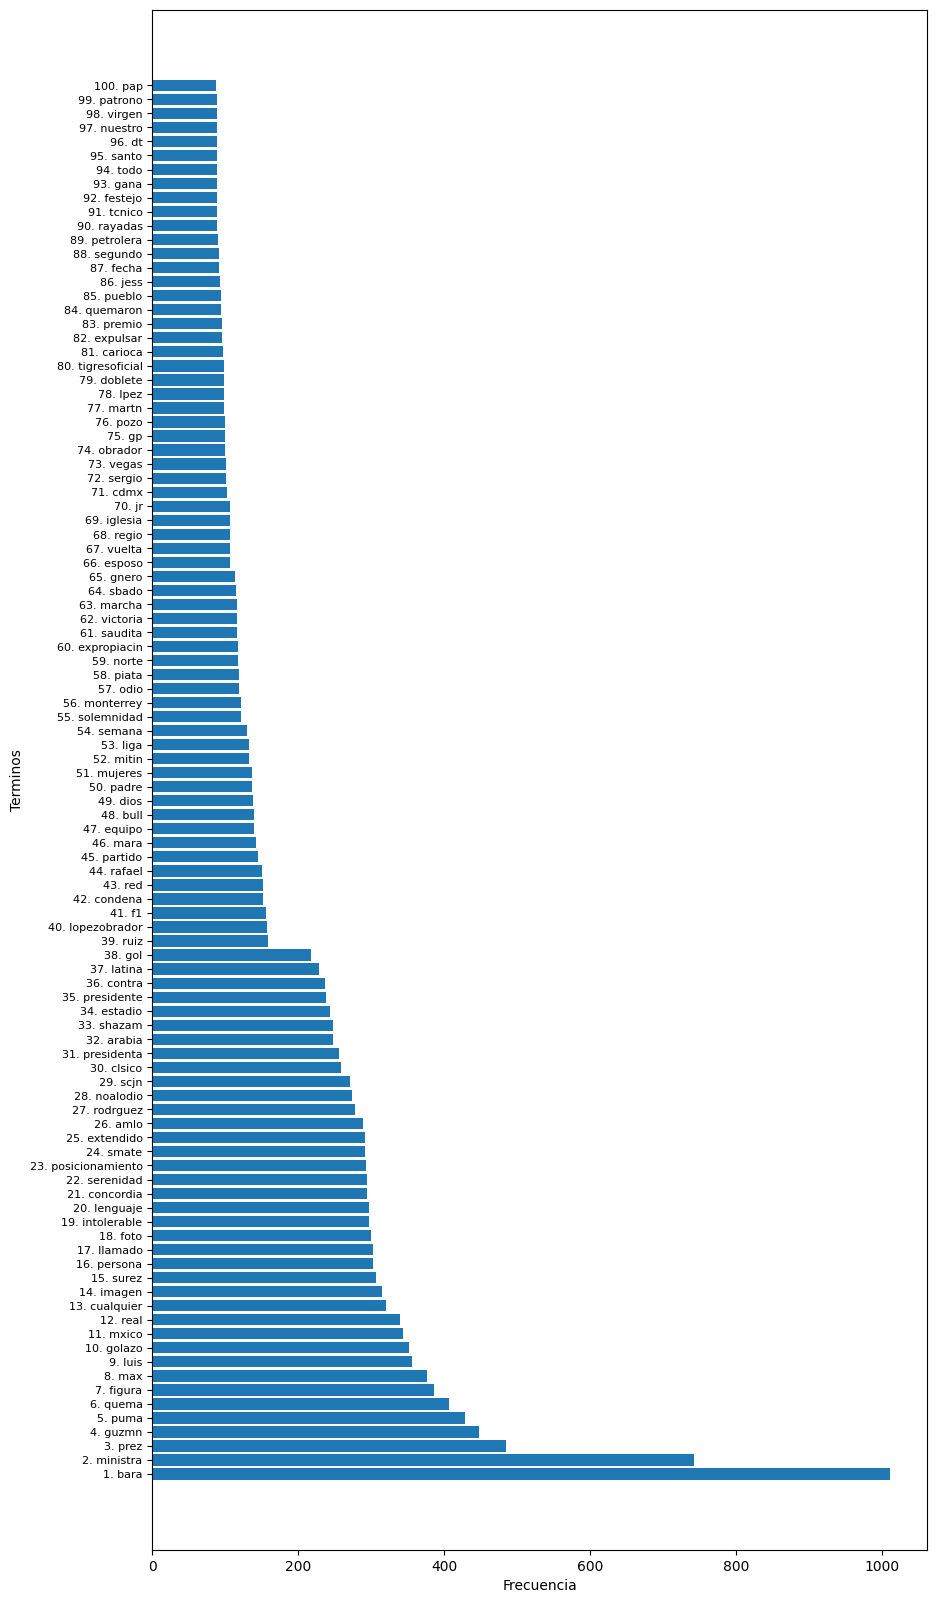

In [11]:
data=bd.get_top_100_words_by_count_w()
terms = [x[0] for x in data]
counts = [x[1] for x in data]


fig, ax = plt.subplots(figsize=(10, 20))  # Create a new figure with a larger size
ax.barh(terms, counts)  # Use horizontal bar chart
ax.set_xlabel('Frecuencia')  # Set the x-axis label
ax.set_ylabel('Terminos')  # Set the y-axis label

# Set the ticks and tick labels for the y-axis
ax.set_yticks(range(len(terms)))

ax.set_yticklabels([f'{i+1}. {term}' for i, term in enumerate(terms)])
# Rotate the tick labels for better readability
plt.setp(ax.get_yticklabels(), rotation=0, fontsize=8)


plt.show()

In [9]:
hashtags=["21m","acarados","alonso_scores14","Americas_scores1611","andra_scores6","azul_scores8","barca_scores16","barce_scores8","benito15","benz_scores6","black3","cabe_scores8"]  
for hashtag in hashtags:
    archivo = ("/home/lucsa/Documentos/sc/" + hashtag +'.csv')
    f=open(archivo, newline='') 
    reader = csv.reader(f)
    tweet_concatenated=""
    for i, row in enumerate(reader):
        if i>0:  
            print(row[0],row[2])        
            bd.update_into_tweetdb1(row[0],row[2])

102566 0.80851066
102567 0.83349395
102568 0.76890165
102569 0.78185344
102570 0.8118143
102571 0.77726424
102572 0.7076208
102573 0.7822373
102574 0.8275727
102575 0.8483023
102576 0.7594789
102577 0.7448966
102578 0.7264286
102579 0.8036493
102580 0.70310646
102581 0.7079655
102582 0.80234987
102583 0.8483023
102584 0.7948959
102585 0.7723204
102586 0.8082502
102587 0.7852489
102588 0.81317157
102589 0.84255356
102590 0.7108873
102591 0.8064681
102592 0.8268995
102593 0.82334614
102594 0.7689447
102595 0.8182263
102596 0.7510445
102597 0.69266397
102598 0.7149986
102599 0.72339433
102600 0.8516332
102601 0.7663532
102602 0.8169039
102603 0.75688565
102604 0.7984402
102605 0.74708253
102606 0.76208794
102607 0.8331319
102608 0.81885135
102609 0.76565737
102610 0.62834466
102611 0.717751
102612 0.80028623
102613 0.7711037
102614 0.7702309
102615 0.78670555
102616 0.7948318
102617 0.7562768
102618 0.7850949
102619 0.81719565
102620 0.81193274
102621 0.8365606
102622 0.75058943
102623 0.

In [5]:
scores=bd.get_score_tweet()
df_scores=pd.DataFrame(scores,columns=["hashtags","Score"])
df_scores.head

<bound method NDFrame.head of          hashtags     Score
0        Cabecita  0.724746
1        Cabecita  0.629508
2        Cabecita  0.746966
3        Cabecita  0.725169
4        Cabecita  0.815835
...           ...       ...
15673  Black Adam  0.788018
15674  Black Adam  0.825316
15675  Black Adam  0.733681
15676  Black Adam  0.685191
15677  Black Adam  0.586684

[15678 rows x 2 columns]>

In [14]:
hashtags_unicos = df_scores['hashtags'].unique()  
dfs_por_hashtag = [] 

for hashtag in hashtags_unicos:
    df_hashtag = df_scores[df_scores['hashtag'] == hashtag] 
    dfs_por_hashtag.append(df_hashtag)  
len(dfs_por_hashtag)
df_1=pd.DataFrame(dfs_por_hashtag[0],columns=["hashtag","scores"])

KeyError: 'hashtag'

In [11]:


# Define bins for sentiment categories
bins = [0, 0.4, 0.65, 1]

# Define labels for sentiment categories
labels = ['Negative', 'Neutral', 'Positive']



# Group by hashtags and Sentiment and count the number of occurrences
grouped =  df_1.groupby(['hashtags']).size().unstack(fill_value=0)

# Plot the grouped data using a stacked bar chart
grouped.plot(kind='bar', stacked=True)

# Add chart title and labels
plt.title('Sentiment Analysis by Hashtag')
plt.xlabel('Hashtags')
plt.ylabel('Count')

# Display the plot
plt.show()


KeyError: 'hashtags'

In [3]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data ,var_group):

  '''
  Univariate_Analysis_categorical
  takesHashtagDB1 a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

In [6]:
df= pd.DataFrame(bd.get_tweets(), columns=[ "Id", "Tweet","Hashtags", "Username", "Rango", "Score" ])   
UVA_category(df ,["Hashtags","Score"])

ValueError: 6 columns passed, passed data had 4 columns